NFL Big Data Bowl 2021

Challenge for Identifying of the Best Defensive Schemes

I define a set features from the exploration, tracking data. The influencia of different variables, choosing which inputs to include through parameters mean and variance.I'm doing data analysis, my goal is to find those observations that are more similar.

In [350]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import datetime as dt
from sklearn.impute import SimpleImputer

In [351]:
df_games = pd.read_csv('../data/games.csv',sep=',', parse_dates=True)
df_games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [352]:
df_games.gameDate.str.slice(0,10).value_counts(ascending=True)

12/24/2018     1
09/27/2018     1
11/29/2018     1
10/18/2018     1
11/12/2018     1
12/10/2018     1
11/01/2018     1
09/20/2018     1
10/15/2018     1
10/08/2018     1
10/04/2018     1
09/13/2018     1
11/26/2018     1
09/24/2018     1
10/01/2018     1
11/08/2018     1
12/03/2018     1
10/29/2018     1
10/11/2018     1
10/25/2018     1
10/22/2018     1
09/06/2018     1
12/06/2018     1
12/17/2018     1
12/13/2018     1
11/15/2018     1
11/19/2018     1
11/05/2018     1
09/17/2018     1
12/22/2018     2
12/15/2018     2
09/10/2018     2
11/22/2018     3
09/09/2018    10
11/18/2018    11
11/25/2018    11
11/04/2018    11
12/16/2018    12
10/28/2018    12
11/11/2018    12
10/21/2018    12
10/14/2018    13
09/30/2018    13
12/23/2018    13
10/07/2018    13
12/09/2018    14
09/23/2018    14
12/02/2018    14
09/16/2018    14
12/30/2018    16
Name: gameDate, dtype: int64

In [353]:
gameDateTimeEaster = df_games.gameDate.str.cat(df_games.gameTimeEastern, sep=' ')

In [354]:
df_games['gameDateTimeEaster'] = pd.to_datetime(gameDateTimeEaster, 
                                                dayfirst=False, 
                                                yearfirst=False, 
                                                format='%m/%d/%y %H:%M:%S', 
                                                infer_datetime_format =True)

In [355]:
df_games.dtypes

gameId                         int64
gameDate                      object
gameTimeEastern               object
homeTeamAbbr                  object
visitorTeamAbbr               object
week                           int64
gameDateTimeEaster    datetime64[ns]
dtype: object

In [356]:
df_games.tail()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDateTimeEaster
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17,2018-12-30 16:25:00
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17,2018-12-30 16:25:00
250,2018123014,12/30/2018,16:25:00,LA,SF,17,2018-12-30 16:25:00
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16,2018-12-22 16:30:00
252,2018122201,12/22/2018,20:20:00,LAC,BAL,16,2018-12-22 20:20:00


In [357]:
df_games.drop(df_games.columns[[1,2]], axis=1, inplace=True)
df_games.sample(n=5)

,gameId,homeTeamAbbr,visitorTeamAbbr,week,gameDateTimeEaster
126,2018110407,DEN,HOU,9,2018-11-04 16:05:00
7,2018090906,NO,TB,1,2018-09-09 13:00:00
62,2018100700,BUF,TEN,5,2018-10-07 13:00:00
250,2018123014,LA,SF,17,2018-12-30 16:25:00
21,2018091607,TEN,HOU,2,2018-09-16 13:00:00


In [358]:
df_games['gameDateTimeEaster'] = df_games['gameDateTimeEaster'].dt.tz_localize('US/Eastern')

In [359]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype                     
---  ------              --------------  -----                     
 0   gameId              253 non-null    int64                     
 1   homeTeamAbbr        253 non-null    object                    
 2   visitorTeamAbbr     253 non-null    object                    
 3   week                253 non-null    int64                     
 4   gameDateTimeEaster  253 non-null    datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](1), int64(2), object(2)
memory usage: 10.0+ KB


In [360]:
df_games = df_games[['gameId', 'gameDateTimeEaster', 'homeTeamAbbr', 'visitorTeamAbbr', 'week']]

In [361]:
df_games.isnull().sum()

gameId                0
gameDateTimeEaster    0
homeTeamAbbr          0
visitorTeamAbbr       0
week                  0
dtype: int64

In [362]:
df_games.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
248    False
249    False
250    False
251    False
252    False
Length: 253, dtype: bool

In [363]:
df_games.nunique()

gameId                253
gameDateTimeEaster    106
homeTeamAbbr           32
visitorTeamAbbr        32
week                   17
dtype: int64

In [364]:
print('Unique values home teams column:', list(df_games.homeTeamAbbr.unique()))

Unique values home teams column: ['PHI', 'CLE', 'IND', 'MIA', 'BAL', 'NE', 'NYG', 'NO', 'ARI', 'CAR', 'GB', 'DET', 'OAK', 'CIN', 'NYJ', 'BUF', 'ATL', 'PIT', 'WAS', 'TEN', 'TB', 'SF', 'LA', 'DEN', 'JAX', 'DAL', 'CHI', 'HOU', 'KC', 'MIN', 'SEA', 'LAC']


In [365]:
df_games[df_games[('gameId')] ==2018091001]

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
12,2018091001,2018-09-10 22:20:00-04:00,OAK,LA,1


In [366]:
df_games[df_games[('visitorTeamAbbr')] =='JAX']

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
6,2018090907,2018-09-09 13:00:00-04:00,NYG,JAX,1
65,2018100705,2018-10-07 13:00:00-04:00,KC,JAX,5
86,2018101410,2018-10-14 16:25:00-04:00,DAL,JAX,6
136,2018111104,2018-11-11 13:00:00-05:00,IND,JAX,10
161,2018112501,2018-11-25 13:00:00-05:00,BUF,JAX,12
189,2018120600,2018-12-06 20:20:00-05:00,TEN,JAX,14
227,2018122302,2018-12-23 13:00:00-05:00,MIA,JAX,16
237,2018123003,2018-12-30 13:00:00-05:00,HOU,JAX,17


In [367]:
df_games[df_games[('week')] == 4]

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
45,2018092700,2018-09-27 20:20:00-04:00,LA,MIN,4
46,2018093002,2018-09-30 13:00:00-04:00,DAL,DET,4
47,2018093003,2018-09-30 13:00:00-04:00,GB,BUF,4
48,2018093004,2018-09-30 13:00:00-04:00,IND,HOU,4
49,2018093001,2018-09-30 13:00:00-04:00,CHI,TB,4
50,2018093000,2018-09-30 13:00:00-04:00,ATL,CIN,4
51,2018093005,2018-09-30 13:00:00-04:00,JAX,NYJ,4
52,2018093007,2018-09-30 13:00:00-04:00,TEN,PHI,4
53,2018093006,2018-09-30 13:00:00-04:00,NE,MIA,4
54,2018093008,2018-09-30 16:05:00-04:00,ARI,SEA,4


In [368]:
df_games[df_games[('visitorTeamAbbr')] =='MIN']

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
14,2018091602,2018-09-16 13:00:00-04:00,GB,MIN,2
45,2018092700,2018-09-27 20:20:00-04:00,LA,MIN,4
72,2018100709,2018-10-07 16:25:00-04:00,PHI,MIN,5
93,2018102107,2018-10-21 13:00:00-04:00,NYJ,MIN,7
148,2018111802,2018-11-18 20:20:00-05:00,CHI,MIN,11
186,2018120212,2018-12-02 16:25:00-05:00,NE,MIN,13
204,2018121000,2018-12-10 20:15:00-05:00,SEA,MIN,14
225,2018122307,2018-12-23 13:00:00-05:00,DET,MIN,16


In [369]:
df_games.loc[df_games['visitorTeamAbbr'] == 'MIN', 'gameDateTimeEaster'].min()

Timestamp('2018-09-16 13:00:00-0400', tz='US/Eastern')

In [370]:
df_games.loc[df_games['visitorTeamAbbr'] == 'MIN', 'gameDateTimeEaster'].max()

Timestamp('2018-12-23 13:00:00-0500', tz='US/Eastern')

In [371]:
df_games[df_games[('homeTeamAbbr')] =='KC']

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
35,2018092305,2018-09-23 13:00:00-04:00,KC,SF,3
65,2018100705,2018-10-07 13:00:00-04:00,KC,JAX,5
97,2018102105,2018-10-21 20:20:00-04:00,KC,CIN,7
106,2018102805,2018-10-28 13:00:00-04:00,KC,DEN,8
137,2018111105,2018-11-11 13:00:00-05:00,KC,ARI,10
195,2018120905,2018-12-09 13:00:00-05:00,KC,BAL,14
205,2018121300,2018-12-13 20:20:00-05:00,KC,LAC,15
238,2018123004,2018-12-30 16:25:00-05:00,KC,OAK,17


In [372]:
df_players = pd.read_csv('../data/players.csv', sep=',')
df_players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [373]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [374]:
df_players['height']=[int(h[0])*12 + int(h[2]) if '-' in h else h for h in df_players['height']]
df_players['height'] = pd.to_numeric(df_players['height'])

In [375]:
df_players.dtypes

nflId           int64
height          int64
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
dtype: object

In [376]:
df_players['height'] = df_players['height'].astype('float')

In [377]:
df_players['weight'] = df_players['weight'].astype('float')

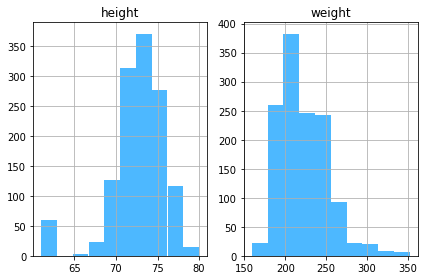

In [378]:
df_players[['height','weight']].hist(color='#4db8ff')
plt.tight_layout()
plt.show()

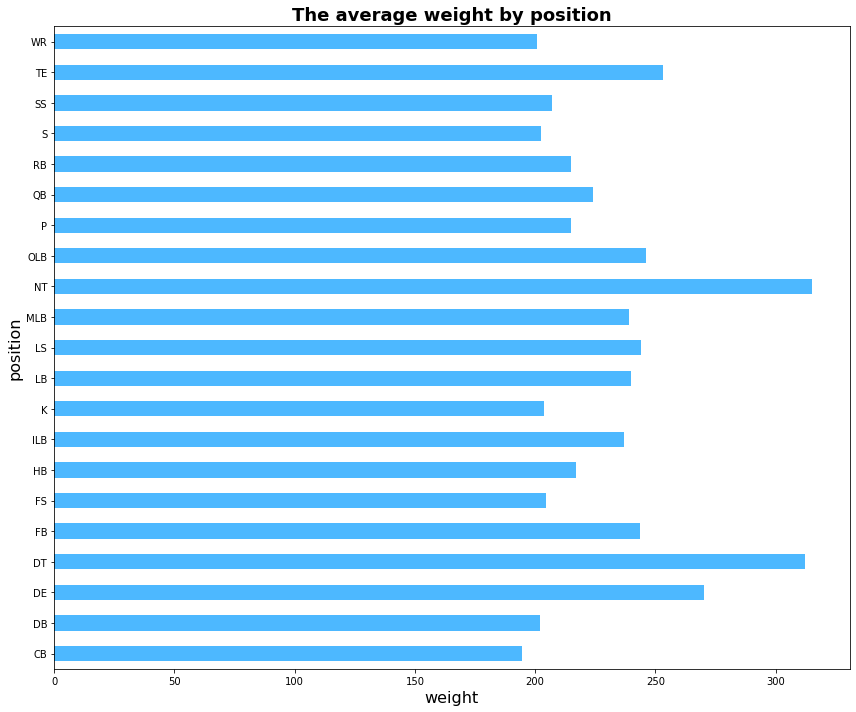

In [379]:
plt.figure(figsize=(12,10))
df_players.groupby('position').weight.mean().plot(kind='barh', color='#4db8ff')
plt.title('The average weight by position', fontsize=18, fontweight='bold')
plt.xlabel('weight',fontsize=16)
plt.ylabel('position',fontsize=16)
plt.tight_layout()
plt.show()

# The motion of defensive back may tend to mirror that offensive player that the conerback is covering

In [380]:
df_players[df_players[('displayName')] =='Mitchell Trubisky']

,nflId,height,weight,birthDate,collegeName,position,displayName
474,2558008,74.0,215.0,1994-08-20,North Carolina,QB,Mitchell Trubisky


In [381]:
df_players[df_players[('displayName')] =='Todd Gurley']

,nflId,height,weight,birthDate,collegeName,position,displayName
571,2552475,73.0,224.0,1994-08-03,Georgia,RB,Todd Gurley


# This does not mean that patterns of motion of defensive backs in man coverage will follow well-defined trajectories, as is the case for wide receivers

In [382]:
df_players[df_players[('displayName')] =='Taylor Gabriel']

,nflId,height,weight,birthDate,collegeName,position,displayName
472,2550617,67.0,168.0,1991-02-17,Abilene Christian,WR,Taylor Gabriel


In [383]:
df_players[df_players[('displayName')] =='Cooper Kupp']

,nflId,height,weight,birthDate,collegeName,position,displayName
574,2557898,74.0,208.0,1993-06-15,Eastern Washington,WR,Cooper Kupp


In [384]:
df_players[df_players[('displayName')] =='Karl Joseph']

,nflId,height,weight,birthDate,collegeName,position,displayName
596,2555342,70.0,200.0,1993-09-08,West Virginia,SS,Karl Joseph


In [385]:
df_players[df_players[('displayName')] =='Xavien Howard']

,nflId,height,weight,birthDate,collegeName,position,displayName
213,2555539,73.0,200.0,1993-07-04,Baylor,CB,Xavien Howard


In [386]:
df_players[df_players[('displayName')] =='Marshon Lattimore']

,nflId,height,weight,birthDate,collegeName,position,displayName
288,2558061,72.0,192.0,1996-05-20,Ohio State,CB,Marshon Lattimore


In [387]:
df_players[df_players[('displayName')] =='Byron Jones']

,nflId,height,weight,birthDate,collegeName,position,displayName
423,2552568,72.0,205.0,1992-09-26,Connecticut,CB,Byron Jones


In [388]:
df_players[df_players[('displayName')] =='Desmond King']

,nflId,height,weight,birthDate,collegeName,position,displayName
621,2557927,70.0,201.0,1994-12-14,Iowa,CB,Desmond King


In [389]:
df_players[df_players[('displayName')] =='Darius Slay']

,nflId,height,weight,birthDate,collegeName,position,displayName
531,2540288,72.0,190.0,1991-01-01,Mississippi State,CB,Darius Slay


In [390]:
df_players[df_players[('displayName')] =='Marlon Humphrey']

,nflId,height,weight,birthDate,collegeName,position,displayName
59,2558067,72.0,197.0,1996-07-08,Alabama,CB,Marlon Humphrey


In [391]:
df_players[df_players[('displayName')] =='Eric Murray']

,nflId,height,weight,birthDate,collegeName,position,displayName
678,2555173,71.0,199.0,1994-01-07,Minnesota,FS,Eric Murray


In [392]:
df_players[df_players[('displayName')] =='Jabaal Sheard']

,nflId,height,weight,birthDate,collegeName,position,displayName
1186,2495228,75.0,268.0,1989-05-10,Pittsburgh,DE,Jabaal Sheard


In [393]:
df_players[df_players[('displayName')] =='Malik Hooker']

,nflId,height,weight,birthDate,collegeName,position,displayName
179,2558060,73.0,212.0,1996-04-02,Ohio State,FS,Malik Hooker


In [394]:
df_players[df_players[('displayName')] =='Reggie Ragland']

,nflId,height,weight,birthDate,collegeName,position,displayName
677,2555169,74.0,252.0,1993-09-23,Alabama,ILB,Reggie Ragland


In [395]:
df_players[df_players[('displayName')] =='Eric Berry']

,nflId,height,weight,birthDate,collegeName,position,displayName
1237,496723,72.0,212.0,12/29/1988,Tennessee,SS,Eric Berry


In [396]:
df_players[df_players[('displayName')] =='Xavier Rhodes']

,nflId,height,weight,birthDate,collegeName,position,displayName
648,2540155,73.0,218.0,1990-06-19,Florida State,CB,Xavier Rhodes


In [397]:
df_players.duplicated().sum()

0

In [398]:
print(df_players.position.value_counts(ascending=True))

NT       5
HB       5
K        5
S       11
LS      12
P       13
FB      19
DT      28
MLB     29
DB      33
DE      49
ILB     56
LB      58
SS      58
FS      65
QB      71
OLB    100
TE     128
RB     135
CB     195
WR     228
Name: position, dtype: int64


In [399]:
df_players.shape

(1303, 7)

In [400]:
df_plays = pd.read_csv('../data/plays.csv', sep=',', parse_dates=True)
df_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [401]:
df_plays.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
possessionTeam             object
playType                   object
yardlineSide               object
yardlineNumber              int64
offenseFormation           object
personnelO                 object
defendersInTheBox         float64
numberOfPassRushers       float64
personnelD                 object
typeDropback               object
preSnapVisitorScore       float64
preSnapHomeScore          float64
gameClock                  object
absoluteYardlineNumber    float64
penaltyCodes               object
penaltyJerseyNumbers       object
passResult                 object
offensePlayResult           int64
playResult                  int64
epa                       float64
isDefensivePI                bool
dtype: object

In [402]:
df_plays.nunique()

gameId                      253
playId                     4592
playDescription           19235
quarter                       5
down                          4
yardsToGo                    34
possessionTeam               32
playType                      3
yardlineSide                 32
yardlineNumber               50
offenseFormation              7
personnelO                   56
defendersInTheBox            11
numberOfPassRushers          11
personnelD                   56
typeDropback                  7
preSnapVisitorScore          45
preSnapHomeScore             46
gameClock                   901
absoluteYardlineNumber       99
penaltyCodes                 86
penaltyJerseyNumbers        666
passResult                    5
offensePlayResult           104
playResult                  123
epa                       19189
isDefensivePI                 2
dtype: int64

In [403]:
print('Unique values in penalty codes column:', list(df_plays.penaltyCodes.unique()))

Unique values in penalty codes column: [nan, 'RPS', 'ING', 'IBW', 'UNRd', 'UNR', 'OH', 'ILF', 'ILM', 'OPI', 'TAU;TAUd;TAU', 'DOF', 'RPS;UNRd', 'DH', 'ICT', 'TAUd', 'TRP', 'UNSd', 'FMM', 'IDP', 'ITP', 'UOHd', 'DSQ', 'DH;DH', 'ILHd', 'DSQd', 'TAU', 'IBB', 'DOF;RPS', 'DPI', 'DH;UNSd', 'UNRd;ICT', 'FMM;HC', 'DOG', 'HC', 'ISH', 'ILH', 'UNS', 'OH;IBB', 'ICB', 'UNR;UNRd', 'DH;DPI', 'UNRd;DH', 'ICT;UNSd', 'IFP', 'OH;OH', 'DTM', 'UNRd;UNR', 'CHB', 'DSQ;DSQd', 'IBW;ISH', 'UNS;UNSd', 'ILH;OH', 'RPS;DOF', 'UOH', 'IBW;OH', 'TAUd;UNSd', 'DH;OPI', 'ILM;DH', 'DPI;OPI', 'ICT;TAU', 'OH;DH', 'DOF;DPI', 'DPI;FMM', 'OH;RPS', 'ICT;ICT', 'DPI;ILH', 'DH;ING', 'DPI;DH', 'DH;DOF', 'DPI;DOF', 'ICT;OPI', 'DPI;ICT;DH', 'OPI;IDP', 'OPI;DH', 'OPI;OH', 'RPS;UNR', 'DH;OH', 'ICT;DPI', 'DH;ICT', 'OPI;UNS', 'ICT;DH', 'RPS;ICT', 'OH;DH;OH', 'OH;DPI', 'TAUd;DH', 'OPI;ILF']


In [404]:
df_plays.isnull().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
gameClock                   639
absoluteYardlineNumber      639
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

In [405]:
median_defendersInTheBox = df_plays['defendersInTheBox'].median() 

In [406]:
print(median_defendersInTheBox)

6.0


In [407]:
df_plays.update(df_plays['defendersInTheBox'].fillna(median_defendersInTheBox))

In [408]:
df_plays['defendersInTheBox'] = df_plays['defendersInTheBox'].astype(np.int64)

In [409]:
median_numberOfPassRushers  = df_plays['numberOfPassRushers'].median() 

In [410]:
print(median_numberOfPassRushers)

4.0


In [411]:
df_plays.update(df_plays['numberOfPassRushers'].fillna(median_numberOfPassRushers, inplace=True))

In [412]:
df_plays['numberOfPassRushers'] = df_plays['numberOfPassRushers'].astype(np.int64)

In [413]:
print('Unique values in the column:', list(df_plays['typeDropback'].unique()))

Unique values in the column: ['TRADITIONAL', 'SCRAMBLE_ROLLOUT_LEFT', 'DESIGNED_ROLLOUT_LEFT', 'SCRAMBLE_ROLLOUT_RIGHT', 'DESIGNED_ROLLOUT_RIGHT', 'SCRAMBLE', 'UNKNOWN', nan]


In [414]:
median_preSnapVisitorScore = df_plays['preSnapVisitorScore'].median() 

In [415]:
df_plays.update(df_plays['preSnapVisitorScore'].fillna(median_preSnapVisitorScore, inplace=True))

In [416]:
print('Unique values in the column:', list(df_plays['preSnapVisitorScore'].unique()))

Unique values in the column: [0.0, 3.0, 6.0, 12.0, 7.0, 14.0, 21.0, 10.0, 17.0, 24.0, 27.0, 34.0, 13.0, 20.0, 9.0, 31.0, 41.0, 48.0, 8.0, 23.0, 38.0, 26.0, 33.0, 29.0, 18.0, 28.0, 35.0, 42.0, 19.0, 16.0, 30.0, 37.0, 22.0, 40.0, 45.0, 5.0, 32.0, 2.0, 15.0, 25.0, 39.0, 51.0, 44.0, 11.0, 36.0]


In [417]:
median_preSnapHomeScore = df_plays['preSnapHomeScore'].median() 

In [418]:
df_plays.update(df_plays['preSnapHomeScore'].fillna(median_preSnapHomeScore, inplace=True))

In [419]:
si = SimpleImputer(
    missing_values=np.nan,  
    strategy='constant',  
    fill_value=0, 
    verbose=0,
    copy=True
)

In [420]:
si.fit(X=df_plays)

df_plays = pd.DataFrame.from_records(
    data=si.transform(
        X=df_plays
    ),  
    columns=df_plays.columns  
)

In [421]:
df_plays.isna().sum()

gameId                    0
playId                    0
playDescription           0
quarter                   0
down                      0
yardsToGo                 0
possessionTeam            0
playType                  0
yardlineSide              0
yardlineNumber            0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
gameClock                 0
absoluteYardlineNumber    0
penaltyCodes              0
penaltyJerseyNumbers      0
passResult                0
offensePlayResult         0
playResult                0
epa                       0
isDefensivePI             0
dtype: int64

In [422]:
df_plays[df_plays[('passResult')] =='R']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18886,2018102808,544,(4:49) (Shotgun) A.Luck scrambles left end ran...,1,3,5,IND,play_type_unknown,IND,45,...,10.0,0,0.0,DH;OH,OAK 99;IND 78,R,18,0,-0.003994,False
18925,2018110410,2201,(1:15) (Shotgun) A.Rodgers scrambles right tac...,2,2,10,GB,play_type_unknown,GB,36,...,10.0,0,0.0,OH;DH,GB 74;NE 91,R,5,0,-0.034272,False
18971,2018111806,4056,(2:00) (Shotgun) D.Watson scrambles up the mid...,4,3,5,HOU,play_type_unknown,WAS,37,...,10.0,0,0.0,DH,WAS 24,R,2,5,0.870164,False
19061,2018120211,4034,(1:46) (Shotgun) M.Mariota scrambles right end...,4,1,10,TEN,play_type_unknown,TEN,14,...,10.0,0,0.0,OH;DH,TEN 78;NYJ 21,R,11,0,-0.002844,False


In [423]:
df_plays.drop(18886, inplace=True)

In [424]:
df_plays.drop(18925, inplace=True)

In [425]:
df_plays.drop(18971, inplace=True)

In [426]:
df_plays.drop(19061, inplace=True)

In [427]:
df_plays[df_plays[('passResult')] == 0]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18777,2018100706,690,(3:08) R.Freeman up the middle to DEN 20 for n...,1,1,10,DEN,play_type_unknown,DEN,20,...,10.0,0,0.0,DH,NYJ 99,0,0,5,0.443308,False
18855,2018102109,2662,(9:07) (Shotgun) D.Johnson left guard to CLV 2...,3,1,10,CLE,play_type_unknown,CLE,29,...,10.0,0,0.0,DH,TB 56,0,-2,5,0.317013,False


In [428]:
df_plays.drop(18777, inplace=True)

In [429]:
df_plays.drop(18855, inplace=True)

In [430]:
df_plays['gameClock'] = pd.DatetimeIndex(df_plays['gameClock'])

In [431]:
df_plays['gameClock'] = pd.to_datetime(df_plays['gameClock'], 
                                            format='%H:%M:%S', 
                                            infer_datetime_format=True).dt.strftime('%H:%M:%S')

# The analyze data of game between the Jacksonville Jaguars and the New York Giants 

In [432]:
df_plays[(df_plays['gameId'] == 2018090907) & (df_plays['possessionTeam'] == 'NYG')]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
486,2018090907,498,(7:55) E.Manning pass short right to R.Ellison...,1,3,23,NYG,play_type_pass,NYG,1,...,0.0,07:55:00,11.0,0,0,C,16,16,-0.043213,False
490,2018090907,641,(5:05) (Shotgun) E.Manning pass deep left to O...,1,1,10,NYG,play_type_pass,NYG,47,...,0.0,05:05:00,57.0,0,0,C,24,24,1.381302,False
491,2018090907,686,(3:32) (Shotgun) E.Manning pass short left to ...,1,2,5,NYG,play_type_pass,JAX,24,...,0.0,03:32:00,86.0,0,0,C,3,3,-0.255913,False
492,2018090907,710,(3:15) (No Huddle) E.Manning pass short right ...,1,3,2,NYG,play_type_pass,JAX,21,...,0.0,03:15:00,89.0,0,0,C,13,13,1.562097,False
500,2018090907,1268,(7:12) (Shotgun) E.Manning pass short left to ...,2,1,20,NYG,play_type_pass,NYG,15,...,3.0,07:12:00,95.0,0,0,C,-1,-1,-0.557140,False
501,2018090907,1292,(6:32) (Shotgun) E.Manning pass short middle t...,2,2,21,NYG,play_type_pass,NYG,14,...,3.0,06:32:00,96.0,0,0,C,5,5,-0.292925,False
502,2018090907,1316,(5:50) (Shotgun) E.Manning pass short left to ...,2,3,16,NYG,play_type_pass,NYG,19,...,3.0,05:50:00,91.0,0,0,C,7,7,-0.904488,False
506,2018090907,1537,"(2:18) (No Huddle, Shotgun) E.Manning pass sho...",2,2,11,NYG,play_type_pass,NYG,24,...,10.0,00:00:00,0.0,0,0,C,12,12,0.695220,False
507,2018090907,1578,(2:00) (Shotgun) E.Manning sacked at NYG 29 fo...,2,1,10,NYG,play_type_sack,NYG,36,...,3.0,02:00:00,74.0,0,0,S,-7,-7,-0.557187,False
508,2018090907,1597,"(1:33) (No Huddle, Shotgun) E.Manning pass sho...",2,2,17,NYG,play_type_pass,NYG,29,...,3.0,01:33:00,81.0,0,0,C,5,5,-0.262902,False


In [433]:
df2_plays = df_plays[(df_plays['gameId'] == 2018090907) & (df_plays['possessionTeam'] == 'NYG')]

In [434]:
pd.crosstab(index=df2_plays.penaltyCodes, columns=df_plays.penaltyJerseyNumbers)

penaltyJerseyNumbers,0,JAX 20,JAX 39,JAX 42,NYG 88
penaltyCodes,,,,,
0,39,0,0,0,0
DH,0,0,1,0,0
DPI,0,1,0,1,0
OPI,0,0,0,0,1


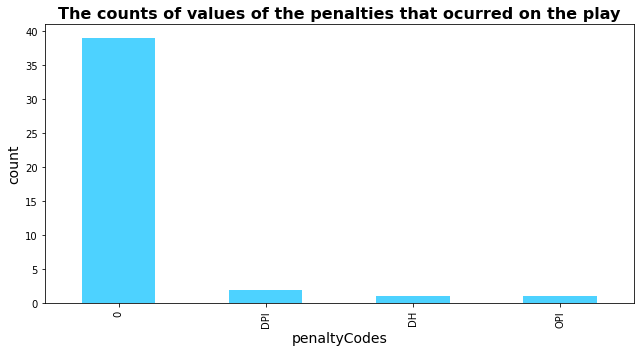

In [435]:
df2_plays['penaltyCodes'].value_counts().plot(kind='bar', color='#4dd2ff', figsize=(9,5))
plt.title('The counts of values of the penalties that ocurred on the play', fontsize=16,fontweight='bold')
plt.xlabel('penaltyCodes', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.tight_layout()
plt.show()

In [436]:
math.floor(df2_plays['preSnapHomeScore'].agg(np.mean))

7

In [437]:
math.floor(df2_plays['preSnapVisitorScore'].agg(np.mean))

12

In [438]:
#Frequency Count
pd.crosstab(index=df2_plays.offenseFormation, columns=df_plays.personnelD)

personnelD,"3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB"
offenseFormation,,,
EMPTY,2,3,0
I_FORM,1,0,2
PISTOL,1,1,0
SHOTGUN,21,5,2
SINGLEBACK,1,2,2


In [439]:
pd.crosstab(index=df2_plays.possessionTeam, columns=df_plays.personnelD)

personnelD,"3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB"
possessionTeam,,,
NYG,26,11,6


In [440]:
df2_plays['possessionTeam'].value_counts(ascending=True).to_frame()

,possessionTeam
NYG,43


In [441]:
math.floor(df2_plays['offensePlayResult'].agg(np.mean))

4

# The analize data for all teams of the regular season  2018

In [442]:
df3_plays = df_plays.drop(columns=['gameId', 'playId', 'playDescription','yardlineSide','gameClock'], inplace=False)

In [443]:
df3_plays.columns

Index(['quarter', 'down', 'yardsToGo', 'possessionTeam', 'playType',
       'yardlineNumber', 'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'absoluteYardlineNumber',
       'penaltyCodes', 'penaltyJerseyNumbers', 'passResult',
       'offensePlayResult', 'playResult', 'epa', 'isDefensivePI'],
      dtype='object')

In [444]:
df3_plays.describe()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa
count,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000
mean,2.591067,1.920345,8.924089,29.860136,6.036032,4.209484,10.700463,12.384339,57.934124,6.279572,6.470285,0.020649
std,1.123109,0.848802,3.974605,12.444665,1.014045,0.883942,9.640624,10.386952,25.588255,10.185151,10.567929,1.580978
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,-78.000000,-11.935951
25%,2.000000,1.000000,6.000000,22.000000,6.000000,4.000000,3.000000,3.000000,38.000000,0.000000,0.000000,-0.745851
50%,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,9.000000,10.000000,58.000000,4.000000,4.000000,-0.190831
75%,4.000000,3.000000,10.000000,40.000000,7.000000,5.000000,17.000000,20.000000,79.000000,10.000000,11.000000,0.976993
max,5.000000,4.000000,41.000000,50.000000,11.000000,10.000000,51.000000,54.000000,109.000000,97.000000,97.000000,8.629316


In [445]:
# The average number of defenders in close proximity to line-of-scrimmage
math.floor(df3_plays.defendersInTheBox.mean())

6

In [446]:
# The average number of pass rushers
math.floor(df3_plays.numberOfPassRushers.mean())

4

In [447]:
df3_plays.groupby('possessionTeam').playResult.agg(['count','min','max','mean'])

,count,min,max,mean
possessionTeam,,,,
ARI,556,-20,75,4.839928
ATL,668,-25,75,7.227545
BAL,607,-78,74,5.995058
BUF,553,-66,75,5.383363
CAR,604,-15,82,6.591060
CHI,545,-18,70,6.928440
CIN,599,-17,49,5.863105
CLE,633,-14,70,6.644550
DAL,602,-14,90,6.089701


In [448]:
group_possesion_team = df3_plays.groupby('possessionTeam')

In [449]:
group_possesion_team 

In [450]:
group_possesion_team.get_group('KC')

,quarter,down,yardsToGo,possessionTeam,playType,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,...,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
1475,1,2,15,KC,play_type_pass,15,EMPTY,"1 RB, 1 TE, 3 WR",5,3,...,0.0,0.0,25.0,0,0,C,15,15,2.389219,False
1478,1,2,9,KC,play_type_pass,30,EMPTY,"0 RB, 1 TE, 4 WR",6,3,...,7.0,0.0,80.0,0,0,C,10,10,1.164486,False
1479,1,1,10,KC,play_type_pass,40,SHOTGUN,"1 RB, 1 TE, 3 WR",7,4,...,7.0,0.0,70.0,0,0,C,40,40,2.353107,False
1480,1,2,9,KC,play_type_pass,19,SHOTGUN,"1 RB, 1 TE, 3 WR",6,4,...,7.0,0.0,29.0,0,0,C,19,19,2.654171,False
1488,1,1,10,KC,play_type_pass,39,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,5,...,14.0,0.0,71.0,0,0,C,17,17,1.095161,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19062,1,1,10,KC,play_type_unknown,32,SHOTGUN,"1 RB, 1 TE, 3 WR",6,4,...,9.0,10.0,0.0,DPI,OAK 23,I,0,26,1.613536,True
19090,1,1,10,KC,play_type_unknown,13,SINGLEBACK,"2 RB, 2 TE, 1 WR",8,4,...,9.0,10.0,0.0,DPI,BAL 29,I,0,12,0.805474,True
19091,4,2,18,KC,play_type_unknown,42,SHOTGUN,"1 RB, 1 TE, 3 WR",6,4,...,9.0,10.0,0.0,DH,BAL 48,C,17,5,0.695113,False
19129,4,3,10,KC,play_type_unknown,37,SHOTGUN,"1 RB, 2 TE, 2 WR",5,4,...,9.0,10.0,0.0,DH,LAC 20,I,0,5,1.744692,False


In [451]:
df3_plays.groupby('personnelD').playResult.agg(['count','min','max','mean'])

,count,min,max,mean
personnelD,,,,
0,26,0,0,0.000000
"0 DL, 2 LB, 4 DB, 3 RB,2 WR",1,12,12,12.000000
"0 DL, 3 LB, 3 DB, 2 RB,2 TE,1 WR",1,7,7,7.000000
"0 DL, 3 LB, 4 DB, 3 RB,1 QB",1,66,66,66.000000
"0 DL, 4 LB, 4 DB, 1 RB,2 WR",1,10,10,10.000000
"0 DL, 4 LB, 4 DB, 1 TE,2 WR",1,15,15,15.000000
"0 DL, 4 LB, 7 DB",32,-10,40,4.687500
"0 DL, 5 LB, 6 DB",17,-15,34,4.176471
"0 DL, 6 LB, 5 DB",6,-4,19,2.666667


In [452]:
df3_plays['personnelO'].value_counts(ascending=True)

1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB             1
4 RB, 1 TE, 0 WR                                1
6 OL, 1 RB, 1 TE, 1 WR,1 DL                     1
2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB             1
1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB             1
1 RB, 0 TE, 3 WR,1 DL                           1
1 RB, 0 TE, 3 WR,1 DB                           1
1 RB, 1 TE, 2 WR                                1
7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K             1
2 QB, 2 RB, 2 TE, 0 WR                          1
0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K              1
0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB        1
0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K              1
1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB        1
0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB             1
1 RB, 1 TE, 2 WR,1 DB                           1
1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB             1
1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB        1
1 RB, 2 TE, 1 WR,1 P,4 LB,1 LS,1 DB             1
6 OL, 0 RB, 0 TE, 0 WR,4 DL                     1


In [453]:
df3_plays.groupby('personnelO').offensePlayResult.agg(['count','min','max','mean'])

,count,min,max,mean
personnelO,,,,
0,26,-1,39,7.076923
"0 RB, 0 TE, 5 WR",36,-9,23,5.916667
"0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K",1,4,4,4.000000
"0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB",1,7,7,7.000000
"0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB",2,0,7,3.500000
"0 RB, 1 TE, 4 WR",173,-15,78,6.323699
"0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K",1,2,2,2.000000
"0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB",1,66,66,66.000000
"0 RB, 2 TE, 3 WR",51,-8,76,7.117647


In [454]:
df3_plays.groupby('personnelO').defendersInTheBox.mean()

personnelO
0                                            6.000000
0 RB, 0 TE, 5 WR                             5.138889
0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K           6.000000
0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB     6.000000
0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB     6.000000
0 RB, 1 TE, 4 WR                             5.138728
0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K           6.000000
0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB          6.000000
0 RB, 2 TE, 3 WR                             5.352941
0 RB, 3 TE, 2 WR                             6.000000
1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB     6.000000
1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB          6.000000
1 RB, 0 TE, 3 WR,1 DB                        7.000000
1 RB, 0 TE, 3 WR,1 DL                        6.000000
1 RB, 0 TE, 4 WR                             5.395604
1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB     6.000000
1 RB, 1 TE, 2 WR                             6.000000
1 RB, 1 TE, 2 WR,1 DB                        6.000000
1 RB, 1 TE, 2 WR,

In [455]:
#The frequency of distirbution number of defenders in close proximity to line-of-scrimmage 
frequency_distribution =df3_plays['defendersInTheBox']
frequency_distribution.sort_values(ascending=True)

8582      1
2519      1
1708      2
14248     2
11160     2
         ..
1225     11
7292     11
18818    11
1197     11
15646    11
Name: defendersInTheBox, Length: 19233, dtype: int64

In [456]:
at = frequency_distribution.max() - frequency_distribution.min()
at

10

In [457]:
#calculate the class amplitude value
k = math.sqrt(len(frequency_distribution))
h = at/k 
h = math.ceil(h)

In [458]:
frequencias = []

smallest = round(frequency_distribution.min(),1)
smallest_amp = round(smallest+h,1)

value = smallest
while value < frequency_distribution.max():
    frequencias.append('{} - {}'.format(round(value,1),round(value+h,1)))
    value += h

In [459]:
freq_abs = pd.qcut(frequency_distribution,len(frequencias), duplicates='drop')  
print(pd.value_counts(freq_abs))

(5.0, 6.0]      8882
(0.999, 5.0]    4769
(6.0, 7.0]      4400
(7.0, 11.0]     1182
Name: defendersInTheBox, dtype: int64


Reference : 
https://arxiv.org/abs/1906.11373